# Analyse de données de dépenses de santé

INFMDI721 - DM - 04/11/2019

**Consigne :**<br /> 
Sujet assez ouvert, semblable à ce qu'on fera le 22/11 :

Peut-on établir un lien entre la densité de médecins par spécialité et par territoire et la pratique du dépassement d'honoraires ? Est-ce dans les territoires où la densité est la plus forte que les médecins pratiquent le moins les dépassements d'honoraires ? Est-ce que la densité de certains médecins / praticiens est corrélée à la densité de population pour certaines classes d'âges (bébé/pédiatre, personnes âgées / infirmiers etc...) ?

C'est un sujet issu du Hackathon "données de santé" de Etalab (la page contient des liens vers différents jeux de données utiles, ainsi que d'autres exemples de questions que vous pouvez préférer aborder). Vous pouvez compléter ça avec des données de l'INSEE et des données sur la démographie des médecins.

Dataset choisi :
- fichier R2017 : https://www.data.gouv.fr/fr/datasets/depenses-d-assurance-maladie-hors-prestations-hospitalieres-par-caisse-primaire-departement/#_
- https://www.ameli.fr/l-assurance-maladie/statistiques-et-publications/donnees-statistiques/professionnels-de-sante-liberaux/honoraires/honoraires-totaux-et-moyens.php
On aurait également pu utiliser ce dataset :
- https://www.data.gouv.fr/fr/datasets/depenses-d-assurance-maladie-hors-prestations-hospitalieres-donnees-nationales/
- https://www.data.gouv.fr/fr/datasets/depenses-d-assurance-maladie-hors-prestations-hospitalieres-donnees-nationales/

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors

# Récupération du csv

In [2]:
#df_raw = pd.read_csv("inputs/dm4/R201701.csv", sep=";", encoding = "ISO-8859-1", )
df_raw = pd.read_csv("./inputs/dm4/R201701.CSV", sep=";", encoding = "ISO-8859-1") #add nrows=1000 to load 1000 rows 

/home/xavier/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_raw.head()

,cpam,l_cpam,dpt,l_dpt,region,l_region,l_serie,SERIE,prs_nat,l_prs_nat,...,l_exe_spe1,exe_stj1,l_exe_stj1,top_slm,l_top_slm,rem_mon,rec_mon,dep_mon,act_dnb,act_coe
0,91,091-Foix,09,09-Ariège,73,73-MIDI PYRENEES,C Omnipraticiens,111111,1111,CONSULTATION COTEE C,...,Médecins Omnipraticiens,1,Libéral,0,0-TOP Hors Sections Locales Mutualistes,"-6,90","-23,00","0,00",-1,"-1,00"
1,371,371-Tours,37,37-Indre-et-Loire,24,24-CENTRE,C Omnipraticiens,111111,1111,CONSULTATION COTEE C,...,Médecins Omnipraticiens,1,Libéral,0,0-TOP Hors Sections Locales Mutualistes,"13,80","46,00","0,00",2,"2,00"
2,751,751-Paris,75,75-Paris,11,11-ILE DE FRANCE,C Omnipraticiens,111111,1111,CONSULTATION COTEE C,...,Médecins Omnipraticiens,1,Libéral,0,0-TOP Hors Sections Locales Mutualistes,"-20,70","-69,00","0,00",-3,"-3,00"
3,751,751-Paris,75,75-Paris,11,11-ILE DE FRANCE,C Omnipraticiens,111111,1111,CONSULTATION COTEE C,...,Médecins Omnipraticiens,1,Libéral,1,1-TOP Sections Locales Mutualistes,"20,70","69,00","0,00",3,"3,00"
4,921,921-Nanterre,92,92-Hauts-de-Seine,11,11-ILE DE FRANCE,C Omnipraticiens,111111,1111,CONSULTATION COTEE C,...,Médecins Omnipraticiens,1,Libéral,0,0-TOP Hors Sections Locales Mutualistes,"6,90","23,00","22,00",1,"1,00"


In [4]:
df_raw.shape

(3755934, 37)

## Sélection des colonnes

In [5]:
df_raw.columns

Index(['cpam', 'l_cpam', 'dpt', 'l_dpt', 'region', 'l_region', 'l_serie',
       'SERIE', 'prs_nat', 'l_prs_nat', 'sns_date', 'asu_nat', 'l_asu_nat',
       'cpl_cod', 'l_cpl_cod', 'ben_qlt', 'l_ben_qlt', 'REM_TAU', 'pre_spe',
       'l_pre_spe', 'pre_spe1', 'l_pre_spe1', 'pre_stj1', 'l_pre_stj1',
       'exe_spe', 'l_exe_spe', 'exe_spe1', 'l_exe_spe1', 'exe_stj1',
       'l_exe_stj1', 'top_slm', 'l_top_slm', 'rem_mon', 'rec_mon', 'dep_mon',
       'act_dnb', 'act_coe'],
      dtype='object')

In [6]:
df_raw.describe()

,cpam,region,prs_nat,sns_date,asu_nat,cpl_cod,ben_qlt,REM_TAU,pre_spe,pre_spe1,pre_stj1,exe_spe,exe_spe1,exe_stj1,top_slm,act_dnb
count,3.755934e+06,3.755934e+06,3.755934e+06,3.755934e+06,3.755934e+06,3.755934e+06,3.755934e+06,3.755934e+06,3.755934e+06,3.755934e+06,3.755934e+06,3.755934e+06,3.755934e+06,3.755934e+06,3.755934e+06,3.755934e+06
mean,5.343464e+02,4.880419e+01,2.511769e+03,2.016243e+05,1.228484e+00,1.664326e-01,1.565791e+00,8.221322e+01,2.627383e+01,3.203406e+00,1.181068e+00,4.462857e+01,5.717768e+01,1.379759e+00,2.946037e-01,2.170770e+02
std,2.805595e+02,2.963110e+01,1.072888e+03,5.847326e+01,7.269432e-01,4.445794e-01,9.152719e-01,2.212982e+01,3.549147e+01,2.838568e+00,3.850742e-01,3.853685e+01,3.562441e+01,4.853269e-01,4.558645e-01,5.072619e+03
min,1.100000e+01,1.000000e+00,1.111000e+03,2.012010e+05,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.100000e+01,1.000000e+00,0.000000e+00,-7.634000e+03
25%,3.010000e+02,2.300000e+01,1.451000e+03,2.016080e+05,1.000000e+00,0.000000e+00,1.000000e+00,6.500000e+01,3.000000e+00,2.000000e+00,1.000000e+00,1.700000e+01,1.200000e+01,1.000000e+00,0.000000e+00,1.000000e+00
50%,5.810000e+02,4.300000e+01,3.111000e+03,2.016110e+05,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+02,1.100000e+01,2.000000e+00,1.000000e+00,2.600000e+01,6.000000e+01,1.000000e+00,0.000000e+00,4.000000e+00
75%,7.640000e+02,7.400000e+01,3.313000e+03,2.017010e+05,1.000000e+00,0.000000e+00,2.000000e+00,1.000000e+02,3.100000e+01,2.000000e+00,1.000000e+00,9.900000e+01,9.900000e+01,2.000000e+00,1.000000e+00,1.600000e+01
max,9.760000e+02,9.400000e+01,9.151000e+03,2.017010e+05,8.000000e+00,3.000000e+00,9.000000e+00,1.000000e+02,9.900000e+01,9.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,2.000000e+00,1.000000e+00,1.675281e+06


In [7]:
#df = df_raw[["cpam", "dpt", "dep_mon", "pre_spe", "exe_spe", "exe_spe1", "l_exe_spe", "l_exe_spe1", "l_pre_spe1"]]
df = df_raw[["l_exe_spe", "l_exe_spe1", "dpt", "dep_mon"]]
df.head(20)

,l_exe_spe,l_exe_spe1,dpt,dep_mon
0,01-TOTAL Omnipraticiens,Médecins Omnipraticiens,09,"0,00"
1,01-TOTAL Omnipraticiens,Médecins Omnipraticiens,37,"0,00"
2,01-TOTAL Omnipraticiens,Médecins Omnipraticiens,75,"0,00"
3,01-TOTAL Omnipraticiens,Médecins Omnipraticiens,75,"0,00"
4,01-TOTAL Omnipraticiens,Médecins Omnipraticiens,92,"22,00"
5,01-TOTAL Omnipraticiens,Médecins Omnipraticiens,95,"0,00"
6,01-TOTAL Omnipraticiens,Médecins Omnipraticiens,95,"0,00"
7,01-TOTAL Omnipraticiens,Médecins Omnipraticiens,75,"0,00"
8,01-TOTAL Omnipraticiens,Médecins Omnipraticiens,09,"0,00"
9,01-TOTAL Omnipraticiens,Médecins Omnipraticiens,37,"0,00"


In [8]:
# Transformation du montant (string => float)
df["dep_mon"] = df["dep_mon"].str.replace(".", "").str.replace(",", ".").astype(float)

/home/xavier/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Analyse des dépassements d'honoraires

In [9]:
df[["l_exe_spe1", "dep_mon"]].groupby("l_exe_spe1").count().sort_values("dep_mon", ascending=False)

,dep_mon
l_exe_spe1,
Autres,1213885
Médecins Spécialistes,837812
Infirmiers,589751
Masseurs-Kinésithérapeutes,317970
Laboratoires,283981
Médecins Omnipraticiens,249949
Dentistes Omnipraticiens,120271
Orthophonistes,45583
Sages-Femmes,31613


Dans la documentation il est dit que les dépassements d'honoraires ne concernent que les médecins, pourtant tous les types d'exécutants en pratiquent.<br />
On va maintenant les analyser :


In [12]:
df.groupby(["l_exe_spe1"]).agg({'dep_mon': ['mean','sum','count']}).sort_values([("dep_mon", "mean")], ascending=False)

dep_mon                       
                                   mean           sum    count
l_exe_spe1                                                    
Dentistes Spécialistes      3869.728990  5.945839e+07    15365
Dentistes Omnipraticiens    2487.270170  2.991465e+08   120271
Médecins Spécialistes        241.506106  2.023367e+08   837812
Médecins Omnipraticiens       84.888416  2.121777e+07   249949
Masseurs-Kinésithérapeutes    20.423033  6.493912e+06   317970
Pédicures                     11.717121  2.607997e+05    22258
Sages-Femmes                   9.581673  3.029054e+05    31613
Orthoptistes                   3.299385  9.071988e+04    27496
Orthophonistes                 0.660896  3.012561e+04    45583
Laboratoires                   0.403488  1.145828e+05   283981
Infirmiers                     0.245003  1.444907e+05   589751
Autres                         0.000059  7.220000e+01  1213885

In [13]:
df.groupby(["dpt"]).agg({'dep_mon': ['mean','sum','count']}).sort_values([("dep_mon", "mean")], ascending=False)

dep_mon                    
           mean          sum  count
dpt                                
75   542.765415  51867205.84  95561
92   475.397599  31670988.06  66620
78   407.413932  23219334.82  56992
69   387.998997  24987911.40  64402
94   316.617013  19878799.16  62785
..          ...          ...    ...
15    36.170488    621987.71  17196
23    35.762703    515090.21  14403
48    31.663621    432683.38  13665
973   22.656105    457313.48  20185
976   17.390843    132396.49   7613

[101 rows x 3 columns]

In [14]:
df.groupby(["dpt", "l_exe_spe1"]).mean().unstack()

dep_mon                                                  \
l_exe_spe1    Autres Dentistes Omnipraticiens Dentistes Spécialistes   
dpt                                                                    
01          0.000000              2490.714568            4367.136048   
02          0.000000              1822.383981            2288.160796   
03          0.000000              1546.925887            3258.222771   
04          0.000000               950.449869            1378.162069   
05          0.000000               874.815219            1327.126129   
..               ...                      ...                    ...   
971         0.000000               987.170316            1403.271389   
972         0.000000              1036.631005            1608.520972   
973         0.000000               438.773701             923.601233   
974         0.000061              1387.569353            2480.006282   
976         0.000000               183.624230              66.860000   

                                                               \
l_exe_spe1 Infirmiers Laboratoires Masseurs-Kinésithérapeutes   
dpt                                                             
01           0.035026     0.066957                   1.922227   
02           0.014921     0.343291                   0.761685   
03           0.015862     0.010135                   0.794416   
04           0.003214     0.011896                   0.855817   
05           0.033177     0.000891                   1.023739   
..                ...          ...                        ...   
971          0.113227     0.117499                   9.671186   
972          0.017347     5.215878                   1.185902   
973          0.002901     0.048109                   0.588830   
974          0.017262     0.067570                   0.905908   
976          0.038090    69.521237                   0.072083   

                                                                         \
l_exe_spe1 Médecins Omnipraticiens Médecins Spécialistes Orthophonistes   
dpt                                                                       
01                       65.453077            349.717591       4.714566   
02                       36.881617             94.691879       0.062893   
03                       16.598789             83.630790       0.000000   
04                       23.303806             67.363901       0.000000   
05                       12.698348             41.365900       0.110262   
..                             ...                   ...            ...   
971                      22.372667             42.332532       1.006777   
972                      23.879023            102.207768       0.000000   
973                       3.965169             26.026044       0.002804   
974                       7.219235             59.012643       0.101391   
976                       2.085112             22.903235       0.000000   

                                                
l_exe_spe1 Orthoptistes Pédicures Sages-Femmes  
dpt                                             
01             1.694398  7.891312     2.774324  
02             0.722410  6.091823     1.264608  
03             0.000000  4.738344     0.043114  
04             0.057143  4.668000     2.082621  
05             0.709868  0.317400     0.481159  
..                  ...       ...          ...  
971            3.108571  1.638057     0.706429  
972            0.105843  9.475240     0.384202  
973            0.226276  8.603500     0.042184  
974            0.015305  0.823908     0.185814  
976            0.000000  4.903077     0.127016  

[101 rows x 12 columns]

In [147]:
df.groupby(["dpt"]).mean().describe()

,dep_mon
count,101.000000
mean,124.923312
std,93.804153
min,17.390843
25%,65.163743
50%,98.029102
75%,139.556412
max,542.765415


In [162]:
df.groupby(["l_exe_spe1"]).mean().describe()

,dep_mon
count,12.000000
mean,560.810362
std,1259.632169
min,0.000059
25%,0.596544
50%,10.649397
75%,124.042838
max,3869.728990


In [161]:
df.groupby(["dpt", "l_exe_spe1"]).mean().describe()

,dep_mon
count,1212.000000
mean,459.648525
std,1162.160163
min,-0.176189
25%,0.039428
50%,1.897570
75%,73.189505
max,8469.123740


In [156]:
df.groupby(["dpt", "l_exe_spe1"]).mean().quantile(q=np.arange(0,1,0.05))

,dep_mon
0.00,-0.176189
0.05,0.000000
0.10,0.000000
0.15,0.002894
0.20,0.015296
0.25,0.039428
0.30,0.089155
0.35,0.195003
0.40,0.389658
0.45,0.817298


In [188]:
exec_by_dep_mon = df.groupby(["l_exe_spe1"]).mean().sort_values(["dep_mon"], ascending=False).index

## Visualisation des résultats

In [189]:
df_heatmap = df.groupby(["dpt", "l_exe_spe1"]).mean().unstack()
# Transformation du dataframe, pour pouvoir remplir la heatmap
df_heatmap = df_heatmap.T
df_heatmap.reset_index(inplace=True)
df_heatmap.drop(["level_0"],axis=1, inplace=True)
df_heatmap.set_index("l_exe_spe1", inplace=True)
#df_heatmap.sort_values(by=["13"], ascending=False, inplace=True)
df_heatmap = df_heatmap.reindex(exec_by_dep_mon)

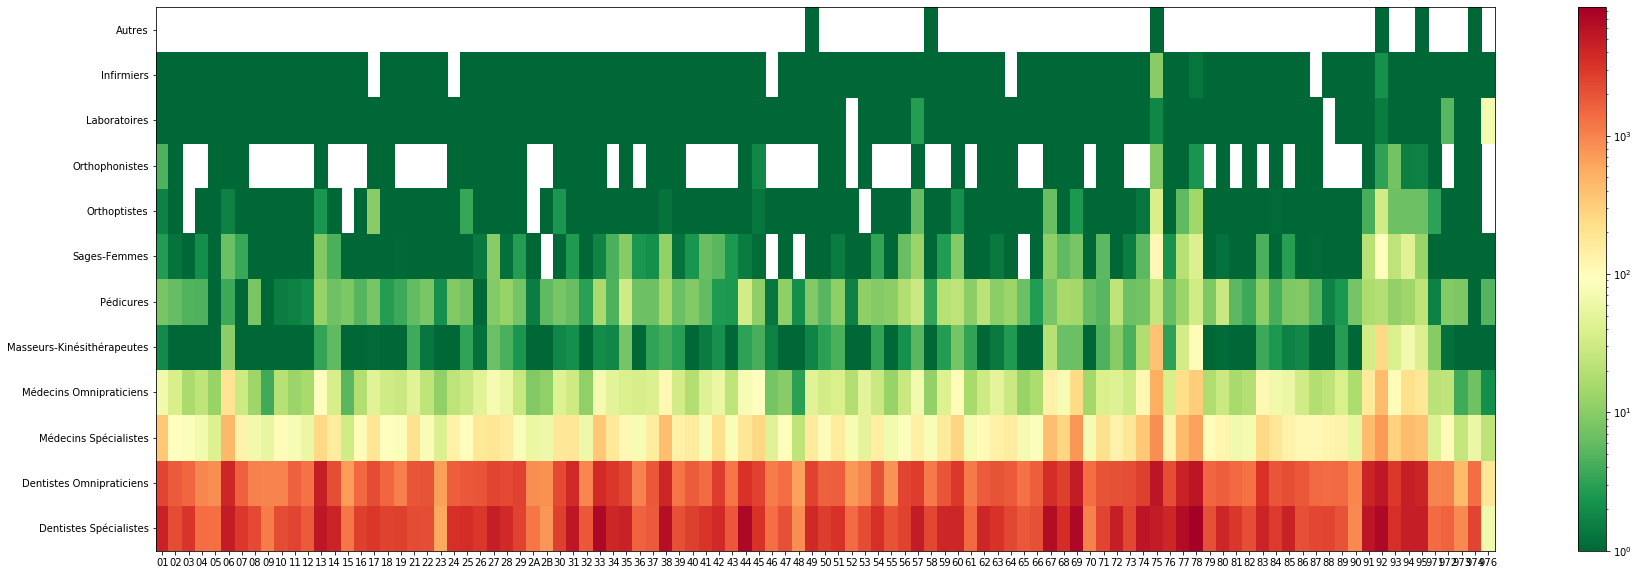

In [190]:
plt.figure(figsize=(30,10))
c = plt.pcolor(df_heatmap, cmap="RdYlGn_r", norm=pltcolors.LogNorm(), vmin=1) # Normalisation logarithmique
plt.yticks(np.arange(0.5, len(df_heatmap.index), 1), df_heatmap.index)
plt.xticks(np.arange(0.5,len(df_heatmap.columns), 1), df_heatmap.columns)
plt.colorbar(c)
plt.show()

## Analyse à part : Quel est le lien entre les prescripteurs et les exécutants ?

In [16]:
df_pre_exec = df_raw[["l_pre_spe1", "l_exe_spe1", "dep_mon"]]

In [17]:
df_pre_exec.groupby(["l_pre_spe1", "l_exe_spe1"]).count()
# Other way to count the number of rows, without considering the column "dep_mon"
#df_pre_exec.groupby(["l_pre_spe1", "l_exe_spe1"]).size().reset_index(name='counts')

dep_mon
l_pre_spe1                          l_exe_spe1                         
Autres                              Autres                       278660
                                    Dentistes Omnipraticiens      28807
                                    Dentistes Spécialistes         1330
                                    Infirmiers                   124784
                                    Laboratoires                  44399
                                    Masseurs-Kinésithérapeutes    67088
                                    Médecins Omnipraticiens       32923
                                    Médecins Spécialistes         75029
                                    Orthophonistes                10895
                                    Orthoptistes                   5169
                                    Pédicures                      4317
                                    Sages-Femmes                   6677
Dentistes libéraux                  Autres                        29121
                                    Dentistes Omnipraticiens      91464
                                    Dentistes Spécialistes        14035
                                    Infirmiers                     2285
                                    Laboratoires                   2201
                                    Masseurs-Kinésithérapeutes     3877
                                    Orthophonistes                 2712
Infirmiers libéraux                 Autres                         9969
                                    Infirmiers                    11552
Masseurs-Kinésithérapeutes libéraux Autres                         4183
Médecins Omnipraticiens libéraux    Autres                       253373
                                    Infirmiers                   150864
                                    Laboratoires                  53051
                                    Masseurs-Kinésithérapeutes   102509
                                    Médecins Omnipraticiens      217026
                                    Orthophonistes                16773
                                    Orthoptistes                   7363
                                    Pédicures                     14137
                                    Sages-Femmes                    942
Médecins Spécialistes libéraux      Autres                       618438
                                    Infirmiers                   294426
                                    Laboratoires                 175015
                                    Masseurs-Kinésithérapeutes   143968
                                    Médecins Spécialistes        762783
                                    Orthophonistes                15203
                                    Orthoptistes                  14964
                                    Pédicures                      3804
                                    Sages-Femmes                    813
Sages-Femmes libérales              Autres                        20141
                                    Infirmiers                     5840
                                    Laboratoires                   9315
                                    Masseurs-Kinésithérapeutes      528
                                    Sages-Femmes                  23181

In [18]:
df_pre_exec.groupby(["l_pre_spe1", "l_exe_spe1"]).size()

l_pre_spe1                           l_exe_spe1                
Autres                               Autres                        278660
                                     Dentistes Omnipraticiens       28807
                                     Dentistes Spécialistes          1330
                                     Infirmiers                    124784
                                     Laboratoires                   44399
                                     Masseurs-Kinésithérapeutes     67088
                                     Médecins Omnipraticiens        32923
                                     Médecins Spécialistes          75029
                                     Orthophonistes                 10895
                                     Orthoptistes                    5169
                                     Pédicures                       4317
                                     Sages-Femmes                    6677
Dentistes libéraux                   Autres     